In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from generatePanorama import generatePanaroma, dataLoader

In [2]:
args_lb = {
    "featureDetection": "SIFT",
    "featureMatching": "FLANN",
    "startPoint": "random",
    "gain": True,
    "blending": "Linear",
    "numBands": 5,
    "sigma": 1,
    "opencv": False
}
args_mb = {
    "featureDetection": "SIFT",
    "featureMatching": "FLANN",
    "startPoint": "degree",
    "gain": True,
    "blending": "MultiBand",
    "numBands": 5,
    "sigma": 0.1,
    "opencv": False
}
args_ocv = {
    "featureDetection": "SIFT",
    "featureMatching": "FLANN",
    "startPoint": "degree",
    "gain": False,
    "blending": "MultiBand",
    "numBands": 5,
    "sigma": 1,
    "opencv": True
}

In [6]:
def generate_results(args,folderName,limit=None):
    data_path = "./data/"+folderName
    results_path = "./results/"+folderName
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    data = dataLoader(data_path,limit)
    color_map,G,panos = generatePanaroma(data, args)
    gain = "gain" if args["gain"] else "no_gain"
    if args["opencv"] == True:
        blend = "OpenCV"
    elif args["blending"] == "MultiBand":
        blend = "MultiBand_{}_{}".format(args["numBands"],args["sigma"])
    elif args["blending"] == "Linear":
        blend = args["blending"]

    i = 1
    for pano in panos:
        plt.imsave(results_path+"/pano_{}_{}_{}_{}.png".format(blend,gain,args["startPoint"],i),pano)
        i+=1
    nx.draw(G, node_color=color_map, with_labels=True, font_weight='bold')
    plt.savefig(results_path+"/network_{}_{}_{}.png".format(blend,gain,args["startPoint"]))
    plt.close()

In [7]:
# generate_results(args_lb,"setBig")
# generate_results(args_lb,"setSingle3")
# generate_results(args_ocv,"setBig")

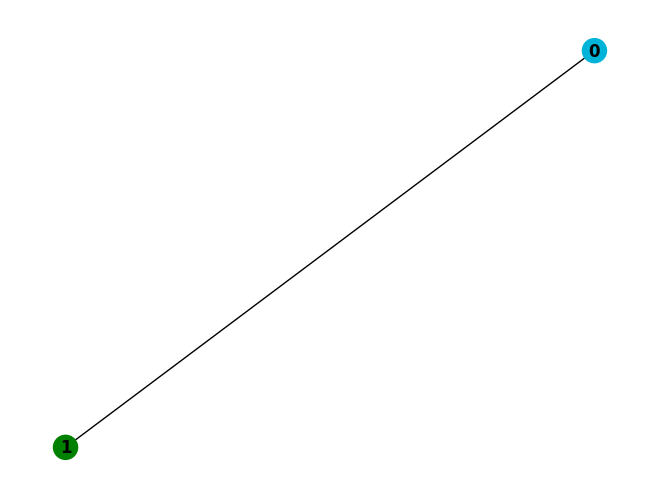

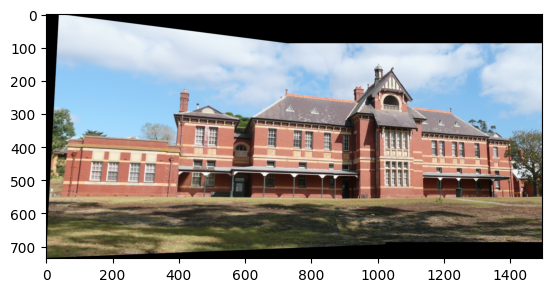

In [27]:
# generate_results(args_lb,"setSingle3")
args_mb = {
    "featureDetection": "SIFT",
    "featureMatching": "FLANN",
    "startPoint": "matches",
    "gain": False,
    "blending": "MultiBand",
    "numBands": 5,
    "sigma": 0.1,
    "opencv": False
}
generate_results(args_mb,"school")
# generate_results(args_ocv,"setSingle3")

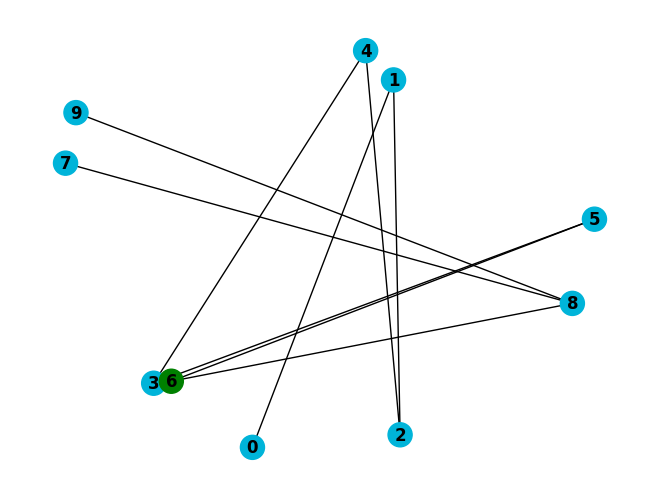

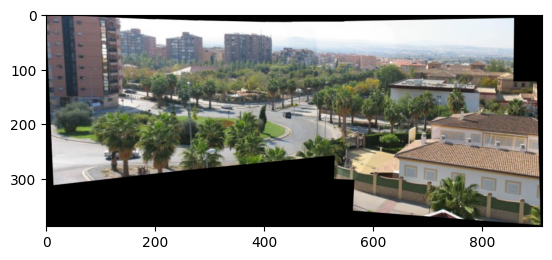

In [10]:
generate_results(args_mb,"setSingle3")

## UDIS-D comparison

In [11]:
def UDIS_image_loader(limit=None):
    input1 = "./data/UDIS-D/input1/"
    input2 = "./data/UDIS-D/input2/"
    output = "./data/UDIS-D/Ours/"
    image_list = []
    gt_list = []
    for filename in os.listdir(input1):
        img1 = cv.imread(os.path.join(input1,filename))
        img2 = cv.imread(os.path.join(input2,filename))
        img3 = cv.imread(os.path.join(output,filename))
        image_list.append([img1,img2])
        gt_list.append(img3)
        if limit!=None and len(image_list)==limit:
            break

    return image_list, gt_list

In [12]:
def UDIS_D_Analysis():
    args_lb = {
        "featureDetection": "SIFT",
        "featureMatching": "FLANN",
        "startPoint": "matches",
        "gain": False,
        "blending": "Linear",
        "numBands": 7,
        "sigma": 1,
        "opencv": False
    }
    args_mb = {
        "featureDetection": "SIFT",
        "featureMatching": "FLANN",
        "startPoint": "matches",
        "gain": False,
        "blending": "MultiBand",
        "numBands": 7,
        "sigma": 1,
        "opencv": False
    }
    args_opencv = {
        "featureDetection": "SIFT",
        "featureMatching": "FLANN",
        "startPoint": "matches",
        "gain": False,
        "blending": "MultiBand",
        "numBands": 7,
        "sigma": 1,
        "opencv": True
    }
    udis_input, udis_gt = UDIS_image_loader(10)
    for i in range(len(udis_gt)):
        img_list = udis_input[i]
        gt = udis_gt[i]
        colormap,G,panos_mb = generatePanaroma(img_list, args_mb)
        colormap,G,panos_lb = generatePanaroma(img_list, args_lb)
        colormap,G,panos_ocv = generatePanaroma(img_list, args_opencv)
        pano_mb = panos_mb[0]
        pano_lb = panos_lb[0]
        pano_ocv = panos_ocv[0]
        str_i = str(i+1).zfill(6) 
        path_mb = "./results/UDIS-D/mb/"+str_i+".jpg"
        path_sb = "./results/UDIS-D/lb/"+str_i+".jpg"
        path_opencv = "./results/UDIS-D/opencv/"+str_i+".jpg"
        plt.imsave(path_mb,pano_mb)
        plt.imsave(path_sb,pano_lb)
        plt.imsave(path_opencv,pano_ocv)

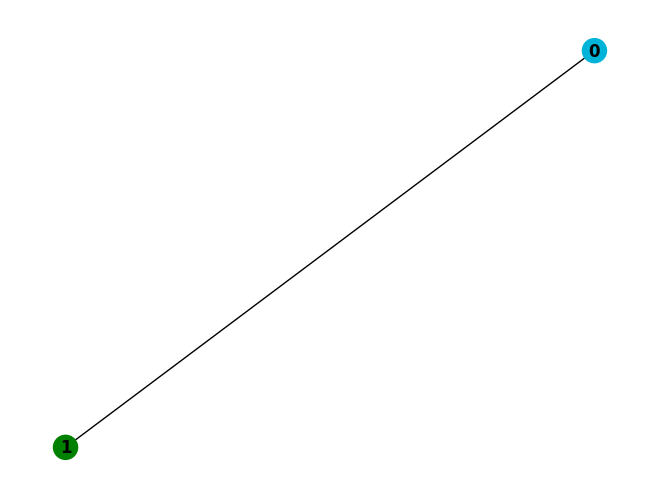

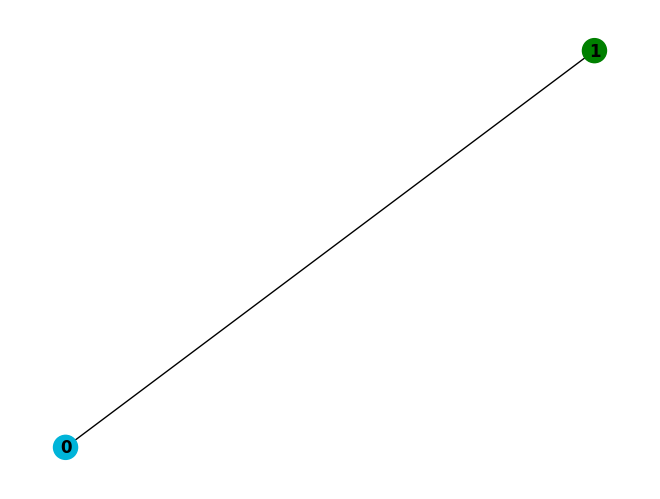

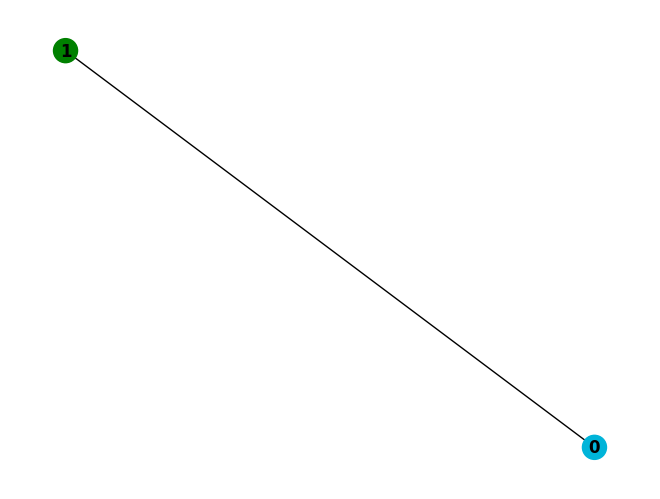

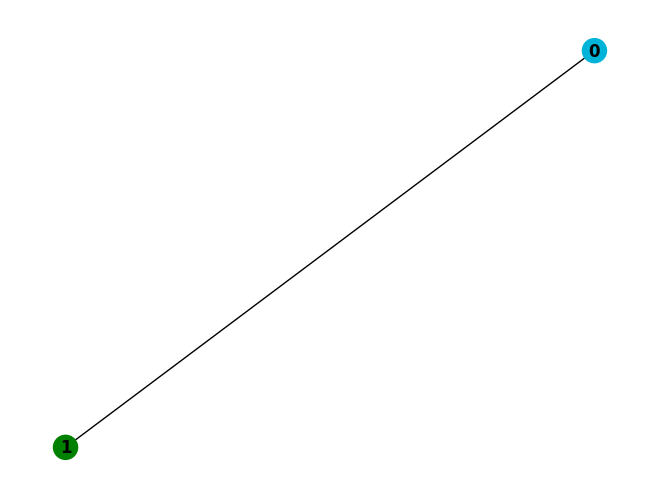

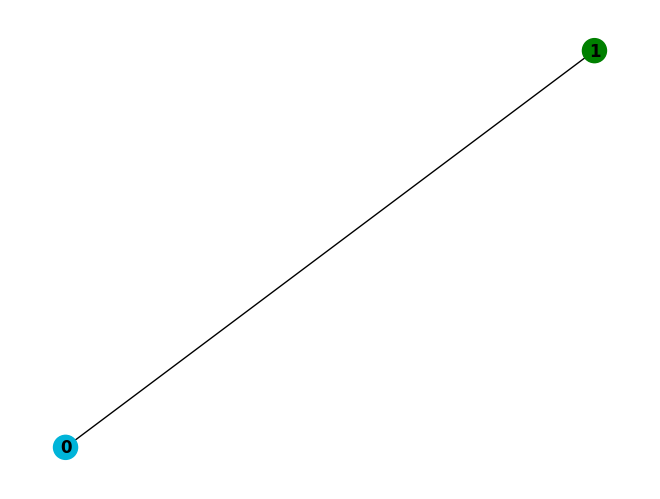

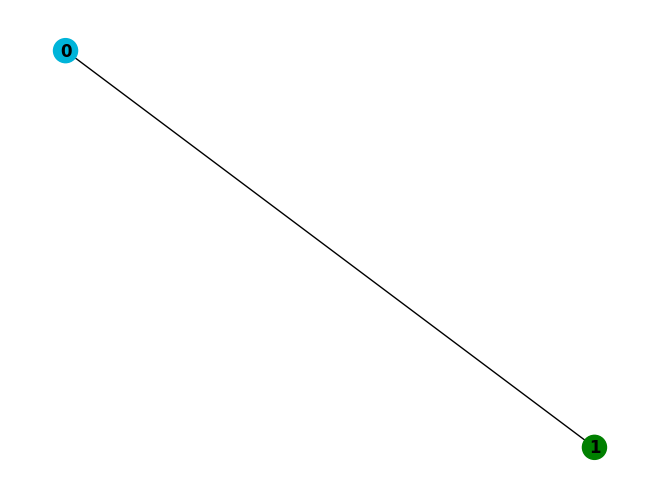

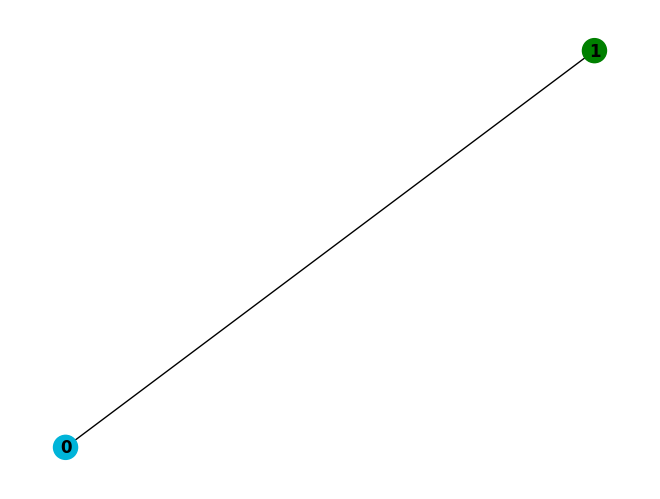

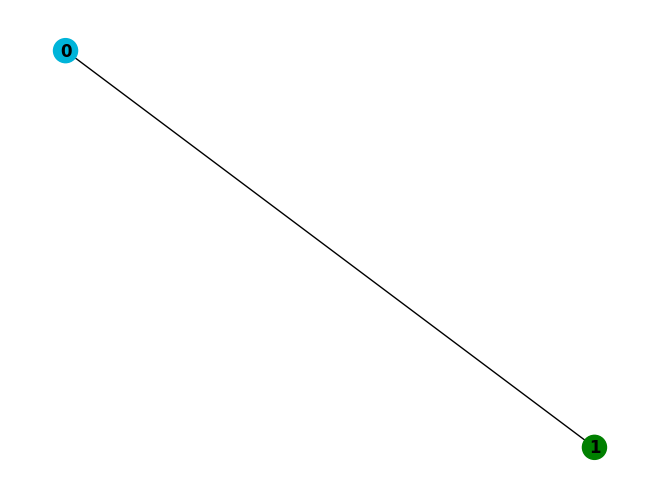

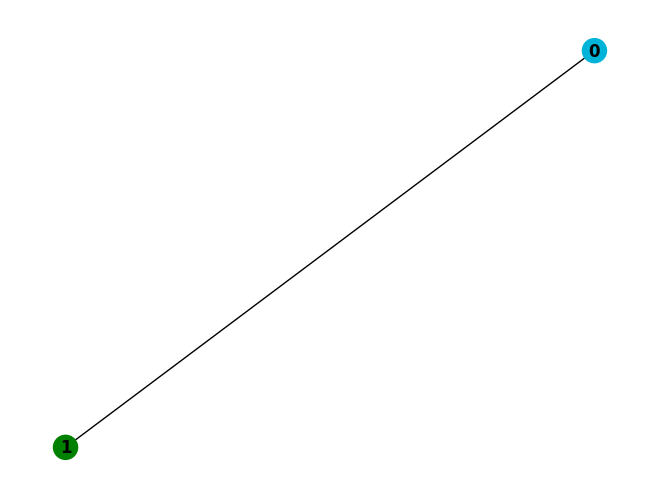

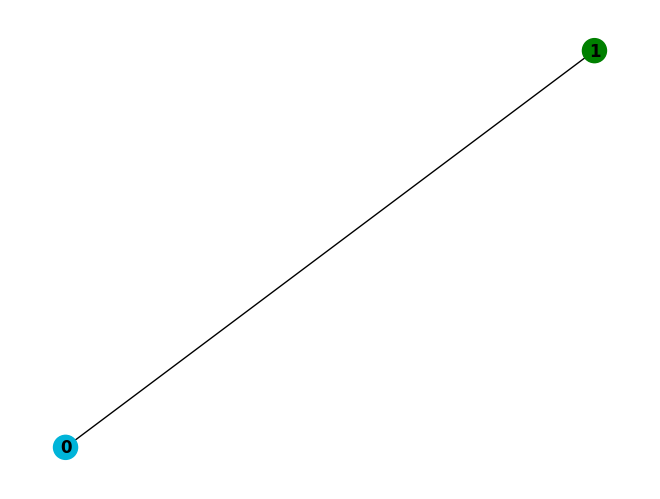

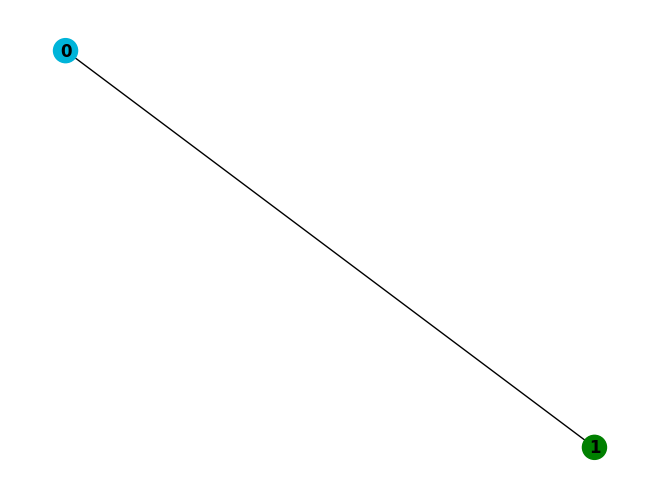

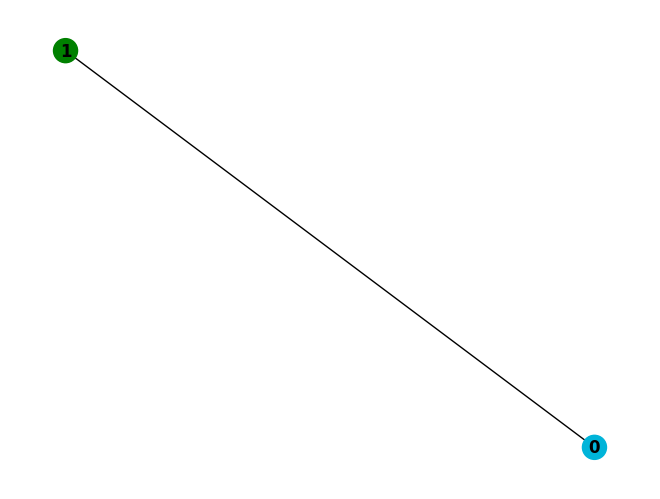

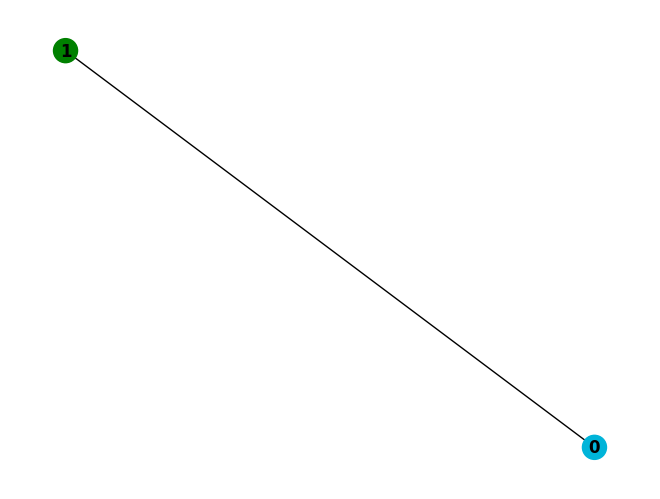

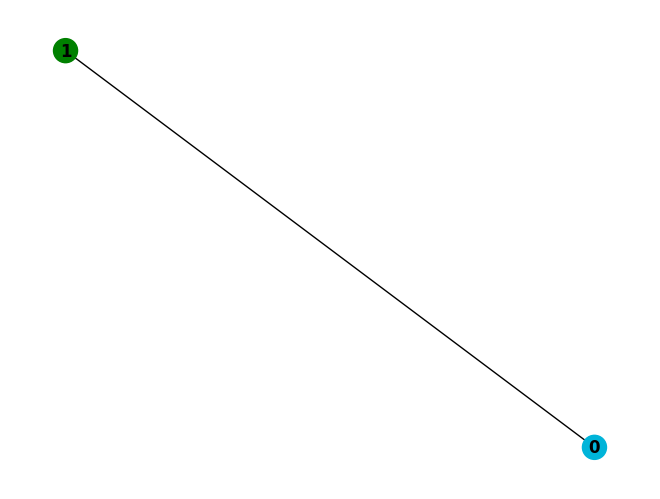

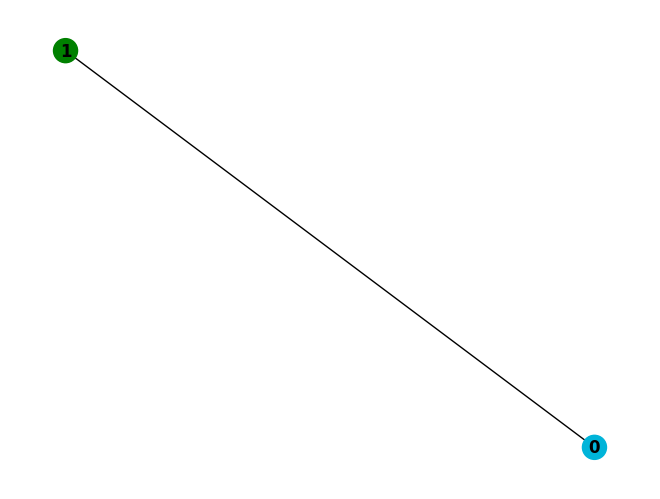

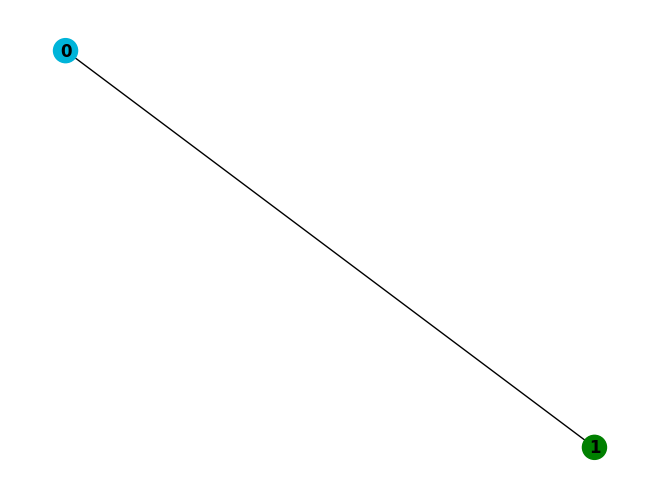

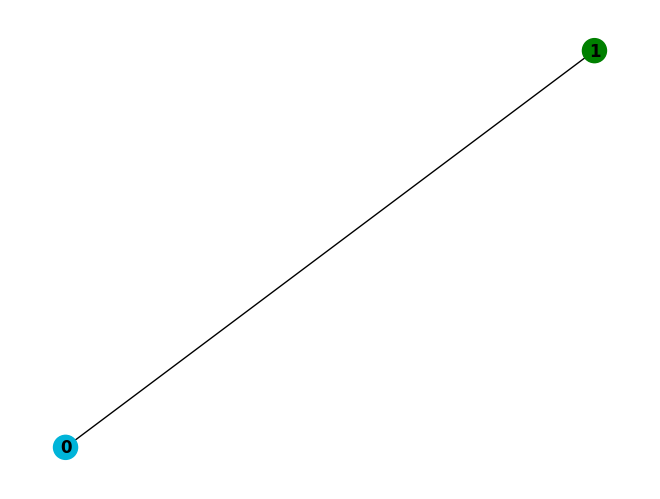

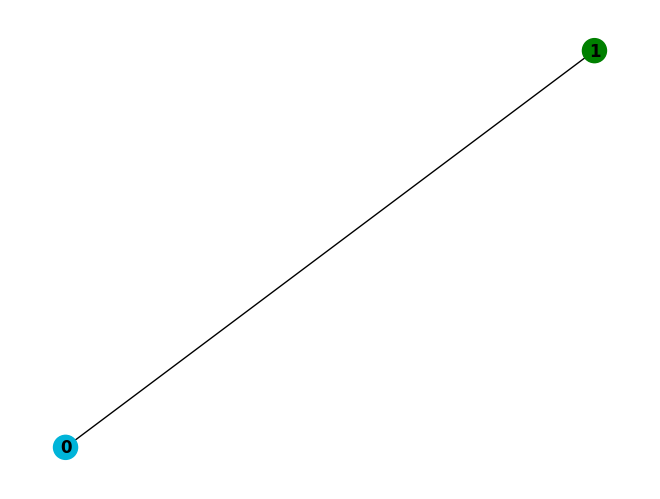

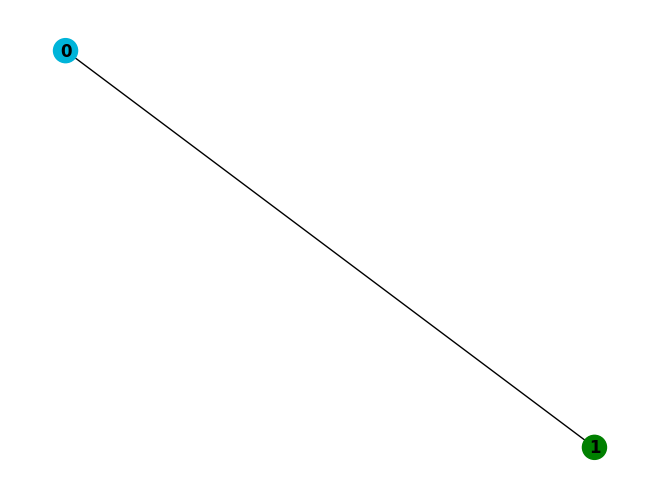

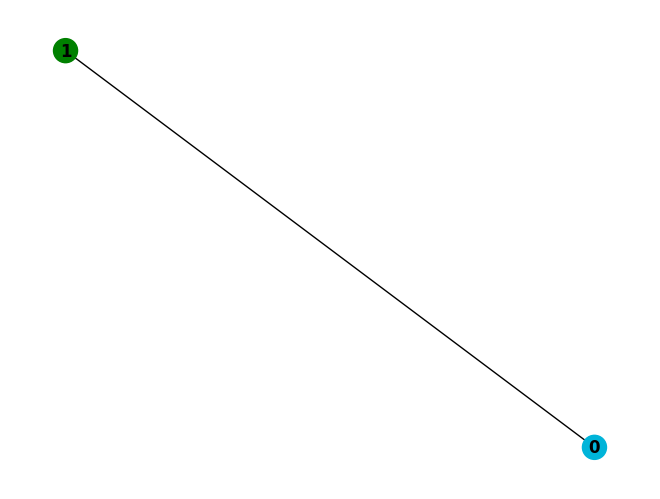

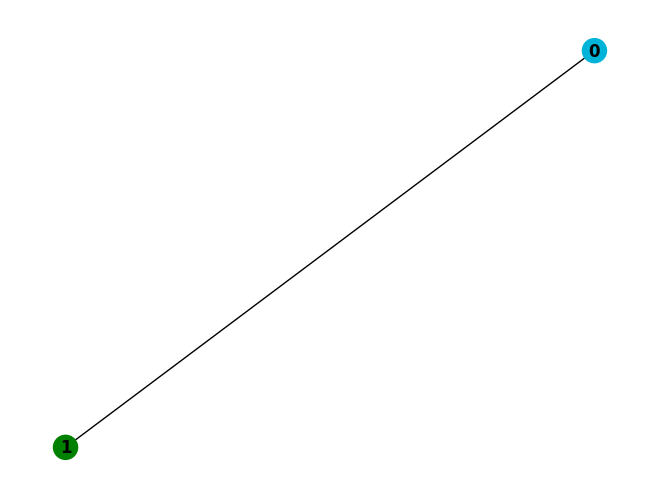

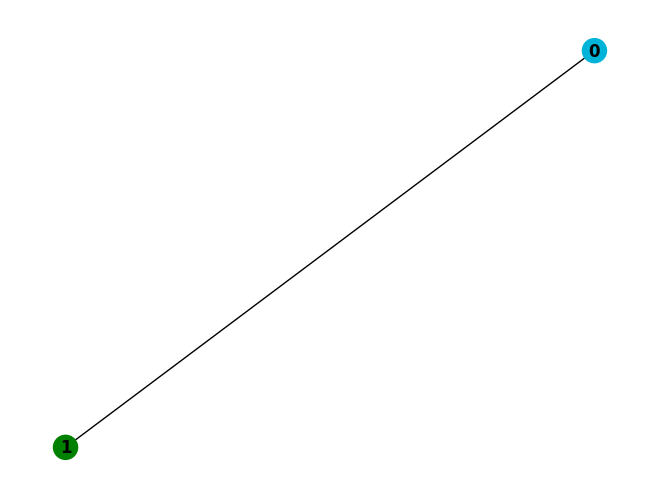

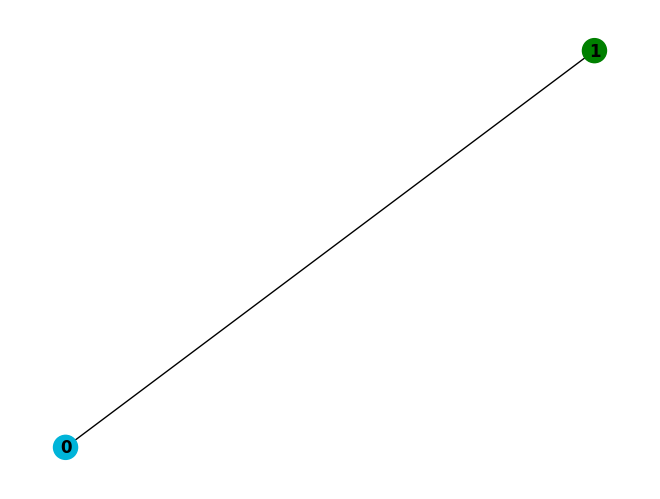

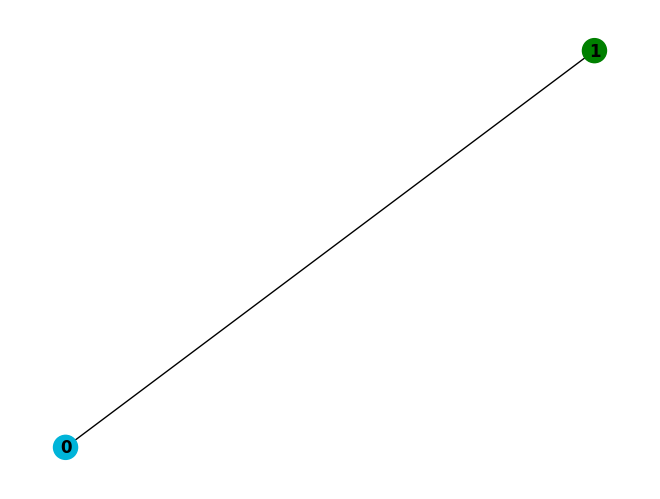

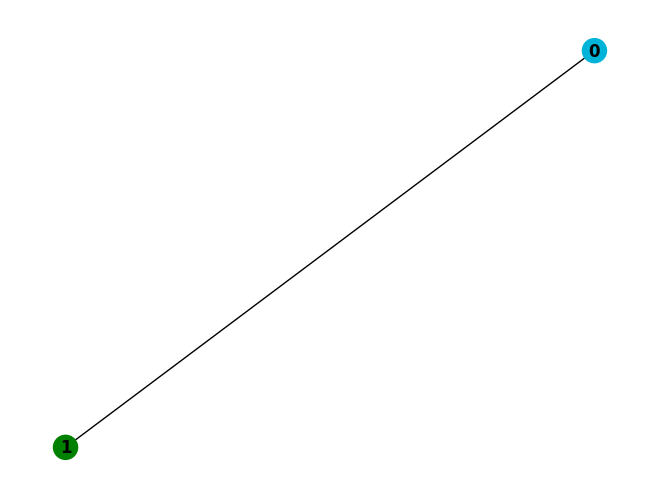

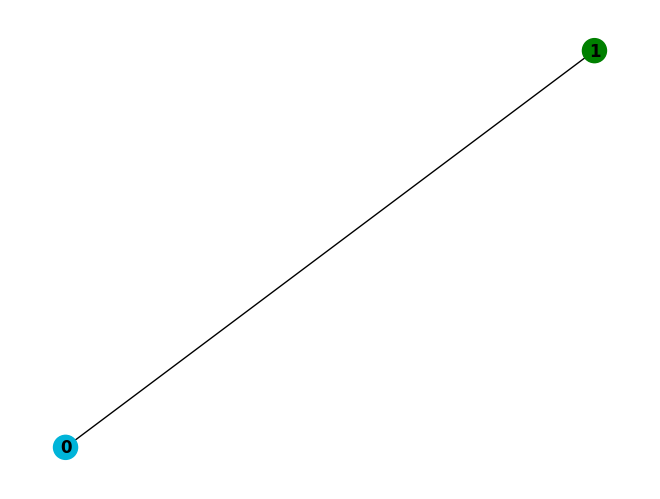

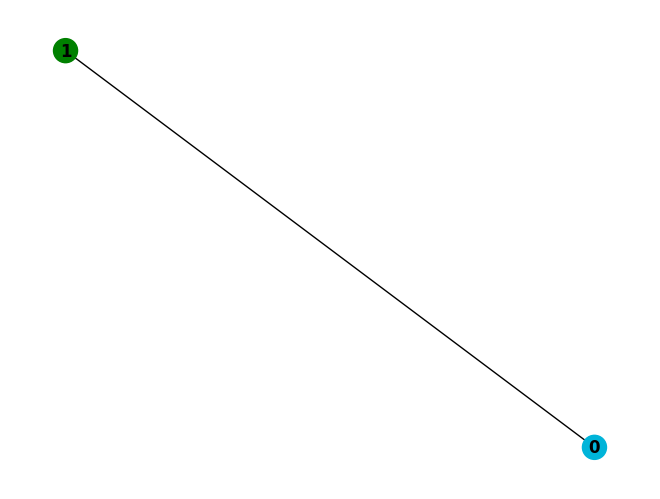

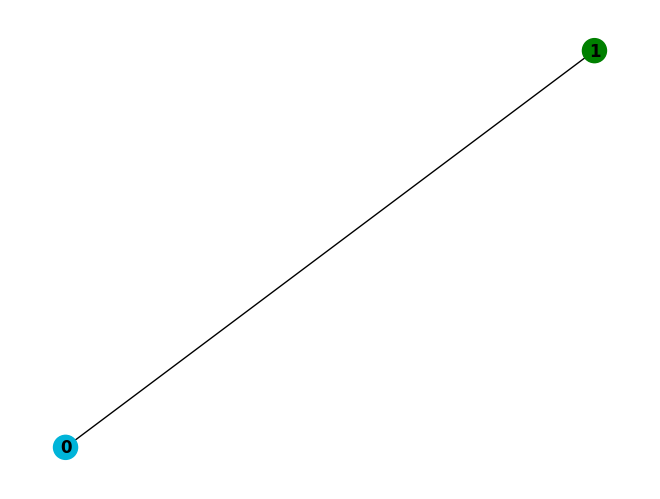

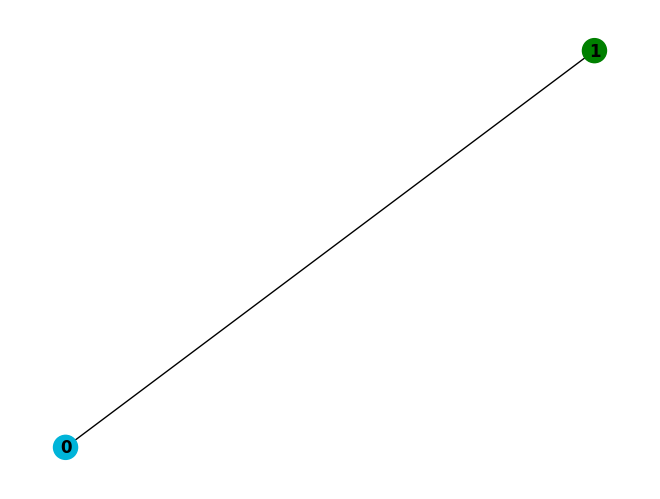

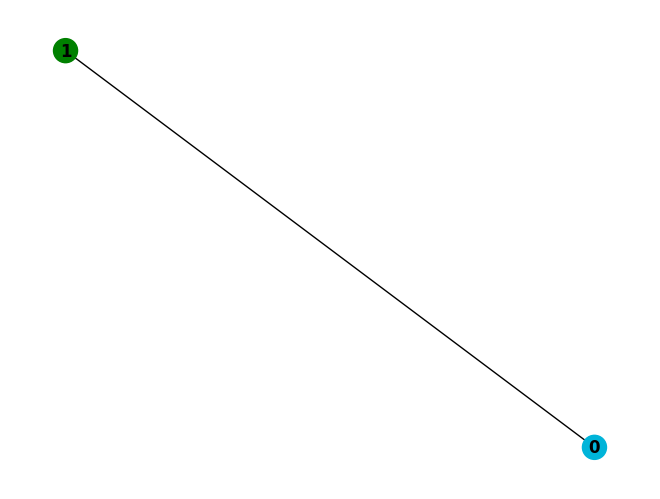

In [13]:
UDIS_D_Analysis()

In [27]:
# compare plots
mb_path = "./results/UDIS-D/mb/"
sb_path = "./results/UDIS-D/lb/"
gt_path = "./data/UDIS-D/Ours/"
mb_list = []
sb_list = []
gt_list = []

for filename in os.listdir(mb_path):
    img = cv.imread(os.path.join(mb_path,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    mb_list.append(img)

for filename in os.listdir(sb_path):
    img = cv.imread(os.path.join(sb_path,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    sb_list.append(img)

for filename in os.listdir(gt_path):
    img = cv.imread(os.path.join(gt_path,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    gt_list.append(img)

# Plot the images
for i in range(len(mb_list)):
    fig, axs = plt.subplots(1,3,figsize=(20,10))
    axs[0].imshow(mb_list[i])
    axs[0].axis('off')
    axs[0].set_title("Multi Band Blending")
    axs[1].imshow(sb_list[i])
    axs[1].axis('off')
    axs[1].set_title("Single Band Blending")
    axs[2].imshow(gt_list[i])
    axs[2].axis('off')
    axs[2].set_title("UDIS-D results")
    str_i = str(i+1).zfill(6)
    path = "./results/UDIS-D/combined/"+str_i+".png"
    plt.savefig(path)
    plt.close()
    # plt.show()